In [89]:
import FYP_LIME
import FYP_mlmodel
import matplotlib.pyplot as plt
import numpy as np

In [94]:
image_Location = "/Users/sumitkhare/Downloads/m1(6) copy.jpg"
model_Location = "/Users/sumitkhare/custom"
model_Weights_Location = "/Users/sumitkhare/custom5epoch"
image_Dimensions = (256,256)

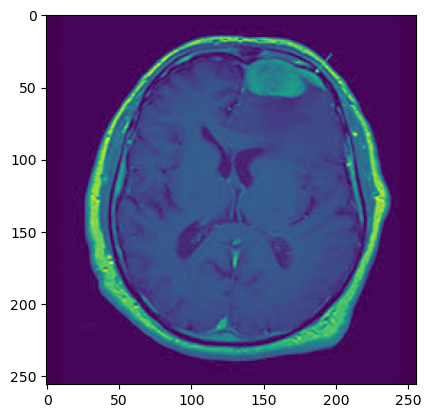

In [95]:
%matplotlib inline
gray_image = FYP_LIME.generateGrayImage(image_Location, image_Dimensions) 
plt.imshow(gray_image[0])

In [96]:
model = FYP_mlmodel.loadModel(model_Location)
model.load_weights(model_Weights_Location)

Model: /Users/sumitkhare/custom loaded successfully


In [97]:
confidences, predicted_Class = FYP_LIME.getImageClass(model, gray_image)

1/1 [==============================] - 0s 233ms/step
Image Prediction Successfull, Confidences:
[0.0006, 0.02756, 0.22237, 0.74946]
Predicted Class:
3


In [98]:
class_test = FYP_LIME.decodePredictions(predicted_Class)

The Predicted Class is: Pituitary Tumour


In [59]:

kernel_Size = 3
max_Distance = 300
ratio = 0.2

num_Perturbations = 150
kernel_width = 0.25

Number of superpixels generated: 80 
Mask:


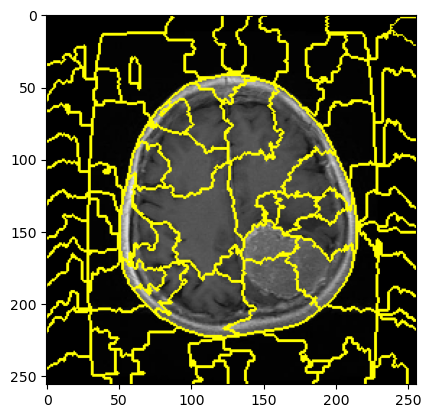

In [60]:
num_superpixels, superpixels = FYP_LIME.generateSuperpixels(image_Location, image_Dimensions, kernel_Size, max_Distance, ratio)

In [61]:
pert_preds, pert_images, perturbations = FYP_LIME.generatePertubations(num_Perturbations, gray_image[0], superpixels, num_superpixels, model)

1/1 [==============================] - 0s 83ms/step


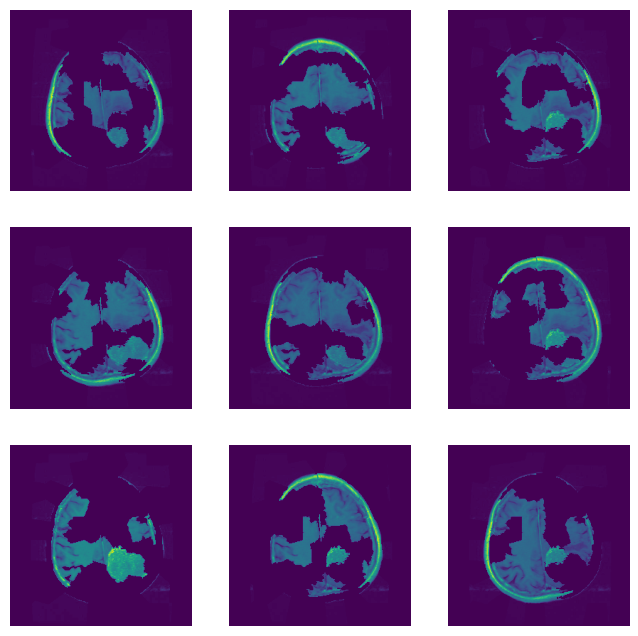

In [73]:
plt.figure(figsize=(8, 8)) 
for i in range(0,9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(pert_images[i].astype(np.float32))
    plt.axis("off")

In [75]:
distances = FYP_LIME.generateDistances(num_superpixels, perturbations)

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 69 while Y.shape[1] == 80

In [76]:
coefficients = FYP_LIME.fitLinModel(kernel_width, distances, predicted_Class, pert_preds, perturbations)

In [77]:
print(f'Number of Coefficients {len(coefficients)}, Number of Superpixels {num_superpixels}')

coefficients

Number of Coefficients 69, Number of Superpixels 80


array([-5.36992311e-03,  2.88308089e-03, -2.48336788e-03, -2.67688592e-03,
        4.30558313e-03,  3.46553308e-03,  1.15300324e-02, -2.76362324e-03,
       -1.89272483e-03,  1.13504101e-03,  7.09371714e-03,  4.23100306e-03,
        3.80833468e-03,  4.39417959e-04, -4.91337400e-03,  1.84005771e-02,
        3.27881817e-03,  9.26028765e-03, -1.79723574e-03,  7.85827953e-03,
       -1.54814004e-03, -7.17555652e-03,  1.04674930e-02, -1.18895420e-02,
        4.84226888e-03, -1.26119626e-02, -5.24824545e-03,  3.48023266e-03,
        3.55581849e-03, -4.85119767e-03,  5.09296842e-03, -3.33434876e-03,
       -3.16059595e-03, -2.63987368e-04, -1.01706346e-02,  1.01836887e-02,
       -1.55746630e-03,  1.31863220e-03, -3.76966971e-03,  4.01605868e-03,
       -9.90898888e-03,  2.18324275e-03, -3.78756579e-03, -3.40149467e-03,
       -2.77056161e-03,  7.11363349e-03,  5.15067413e-03, -6.24218173e-05,
        3.31289107e-03, -9.83775174e-04, -5.98825550e-03, -1.17105607e-02,
        5.71485606e-03, -

In [78]:
sorted_coeffs = np.argsort(coefficients)

In [79]:
sorted_coeffs

array([25, 23, 51, 55, 34, 40, 60, 21, 50, 59, 53,  0, 26, 14, 29, 64, 63,
       57, 42, 38, 43, 31, 32, 44,  7,  3, 62,  2, 66,  8, 18, 36, 20, 49,
       67, 61, 33, 47, 68, 13,  9, 37, 41, 65,  1, 16, 48,  5, 27, 28, 12,
       54, 39, 11,  4, 24, 30, 46, 52, 58, 10, 45, 19, 17, 35, 22, 56,  6,
       15])

In [80]:
sorted_coeffs[-10:]

array([58, 10, 45, 19, 17, 35, 22, 56,  6, 15])

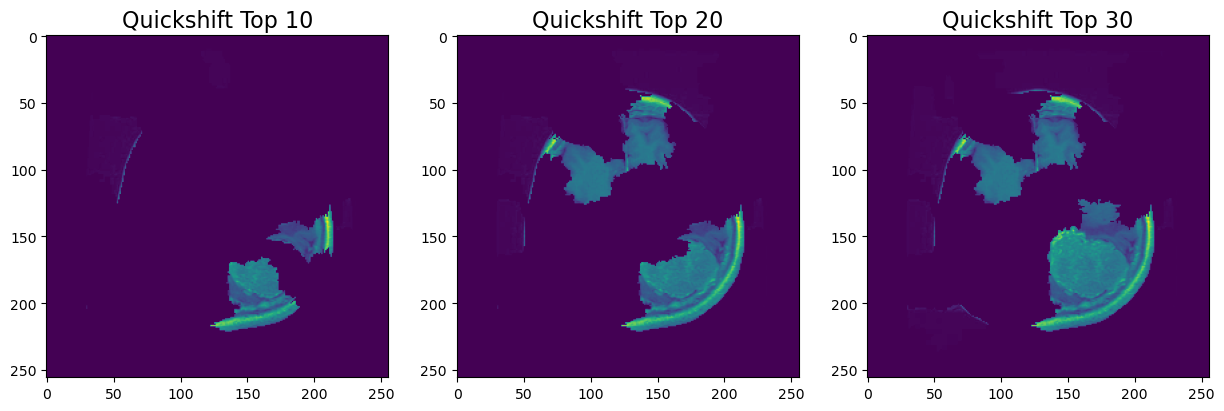

In [81]:
f, axarr = plt.subplots(1, 3, figsize=(15,15))
axarr[0].imshow(FYP_LIME.showExplanation(10, coefficients, num_superpixels, gray_image[0], superpixels).astype(np.float32))
axarr[1].imshow(FYP_LIME.showExplanation(20, coefficients, num_superpixels, gray_image[0], superpixels).astype(np.float32))
axarr[2].imshow(FYP_LIME.showExplanation(30, coefficients, num_superpixels, gray_image[0], superpixels).astype(np.float32))
axarr[0].title.set_text('Quickshift Top 10')
axarr[1].title.set_text('Quickshift Top 20')
axarr[2].title.set_text('Quickshift Top 30')
axarr[0].title.set_fontsize(16)
axarr[1].title.set_fontsize(16)
axarr[2].title.set_fontsize(16)

In [82]:
num_Segmentations = 90
sigma = 15

Number of superpixels generated: 69 
Mask:


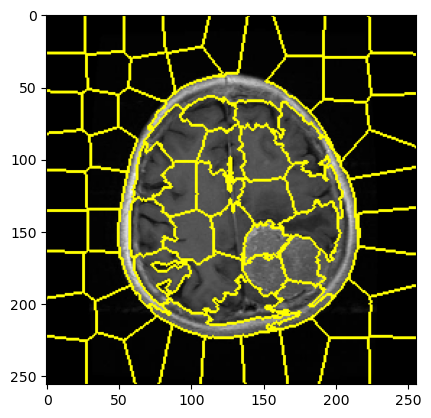

In [83]:
slic_num_superpixels, slic_superpixels = FYP_LIME.generateSuperpixelsSLIC(image_Location, image_Dimensions, num_Segmentations, sigma)

In [84]:
pert_preds, pert_images, perturbations = FYP_LIME.generatePertubations(num_Perturbations, gray_image[0], slic_superpixels, slic_num_superpixels, model)

1/1 [==============================] - 0s 90ms/step


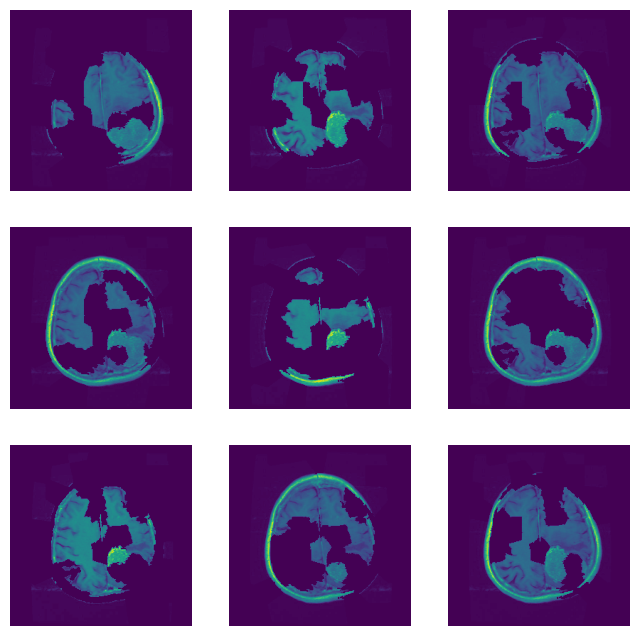

In [85]:
plt.figure(figsize=(8, 8)) 
for i in range(0,9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(pert_images[i].astype(np.float32))
    plt.axis("off")

In [86]:
distances = FYP_LIME.generateDistances(slic_num_superpixels, perturbations)

In [87]:
coefficients = FYP_LIME.fitLinModel(kernel_width, distances, predicted_Class, pert_preds, perturbations)

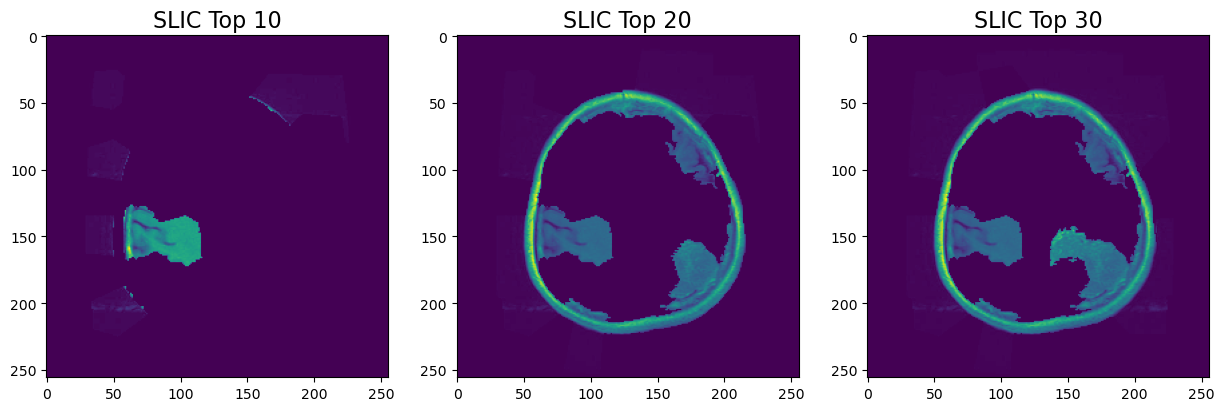

In [88]:
f, axarr = plt.subplots(1, 3, figsize=(15,15))
axarr[0].imshow(FYP_LIME.showExplanation(10, coefficients, slic_num_superpixels, gray_image[0], slic_superpixels).astype(np.float32))
axarr[1].imshow(FYP_LIME.showExplanation(20, coefficients, slic_num_superpixels, gray_image[0], slic_superpixels).astype(np.float32))
axarr[2].imshow(FYP_LIME.showExplanation(30, coefficients, slic_num_superpixels, gray_image[0], slic_superpixels).astype(np.float32))
axarr[0].title.set_text('SLIC Top 10')
axarr[1].title.set_text('SLIC Top 20')
axarr[2].title.set_text('SLIC Top 30')
axarr[0].title.set_fontsize(16)
axarr[1].title.set_fontsize(16)
axarr[2].title.set_fontsize(16)